# Computational and Numerical Methods
## Group 16
### Set 8 (24-09-2018): Numerically Verify and Extend Theory Exercises
#### Vidhin Parmar   201601003
#### Parth Shah      201601086

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.interpolate import spline
from scipy.interpolate import lagrange as l
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')
def lag(x, y, xp, laglab):
    poly = l(x, y)
    plt.plot(xp, poly(xp), label=laglab)
    plt.grid(True)
    plt.legend(loc='best')
    print("The Lagrangian polynomial is:")
    print(poly)
    
def lagwithfunc(f, x, y, xp, lab):
    poly = l(x, y)
    plt.plot(xp, f(xp), label = lab)
    plt.plot(xp, poly(xp), label="Lagrange Polynomial")
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    print("The Lagrangian polynomial is:")
    print(poly)

# Q1 Cubic spline interpolation
# x = [0, 1, 2, 3, 4, 5, 6], y = [2, 2.1592, 3.1697, 5.4332, 9.1411, 14.406, 21.303]:

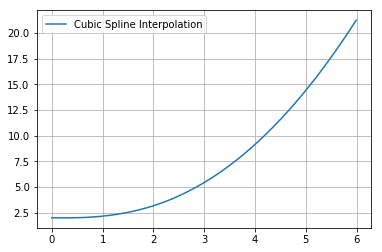

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([2, 2.1592, 3.1697, 5.4332, 9.1411, 14.406, 21.303])
xp = np.arange(0, 6, 0.01)
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Q2 x = [-2, -1, 0] y = [-15, -8, -3]

The Lagrangian polynomial is:
    2
-1 x + 4 x - 3


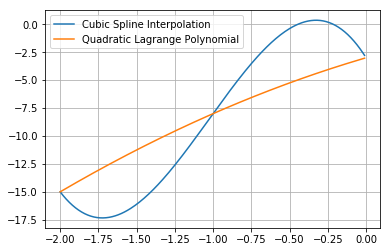

In [3]:
xp = np.arange(-2, 0, 0.01)
x = np.array([-2, -1, 0])
y = np.array([-15, -8, -3])
yp = spline(x, y, xp, order=3, kind='smoothest')
plt.plot(xp, yp, label = "Cubic Spline Interpolation")
lag(x, y, xp, "Quadratic Lagrange Polynomial")

# Q3 Tabulating n,T(n),S(n)

# Q3.1.1 $e^{x}cos(4x)$ from 0 to $\pi$

In [4]:
data = pd.DataFrame(columns=['n', 'T(n)', 'S(n)', 'TError', 'SError'])
cint = (np.exp(np.pi) - 1)/17
for n in range(1, 10):
    x = np.arange(0, np.pi, (np.pi-0)/2**n)
    y = np.exp(x)*np.cos(4*x)
    Tn = np.trapz(y ,x)
    Sn = integrate.simps(y, x)
    data.loc[n] = [2**n, Tn, Sn, Tn - cint, Sn - cint]
data

,n,T(n),S(n),TError,SError
1,2.0,4.563538,4.563538,3.261145,3.261145
2,4.0,-1.695019,-0.898630,-2.997412,-2.201024
3,8.0,-2.919139,-3.297136,-4.221533,-4.599529
4,16.0,-2.216152,-2.438441,-3.518545,-3.740835
5,32.0,-0.766920,-0.815313,-2.069314,-2.117706
6,64.0,0.208529,0.199535,-1.093865,-1.102859
7,128.0,0.743767,0.742045,-0.558627,-0.560349
8,256.0,1.020593,1.020237,-0.281800,-0.282157
9,512.0,1.160929,1.160850,-0.141465,-0.141544


# Q 3.1.2  $x^{2.5}$ from 0 to 1

In [5]:
data = pd.DataFrame(columns=['n', 'T(n)', 'S(n)', 'TError', 'SError'])
cint = 2/7
for n in range(1, 10):
    x = np.arange(0, 1.001, (1-0)/2**n)
    y = x*x*x**0.5
    Tn = np.trapz(y ,x)
    Sn = integrate.simps(y, x)
    data.loc[n] = [2**n, Tn, Sn, Tn - cint, Sn - cint]
data

,n,T(n),S(n),TError,SError
1,2.0,0.338388,0.284518,5.267406e-02,-1.196489e-03
2,4.0,0.298791,0.285593,1.307721e-02,-1.217400e-04
3,8.0,0.288975,0.285702,3.260454e-03,-1.179823e-05
4,16.0,0.286529,0.285713,8.142822e-04,-1.108410e-06
5,32.0,0.285918,0.285714,2.034940e-04,-1.020813e-07
6,64.0,0.285765,0.285714,5.086654e-05,-9.279914e-09
7,128.0,0.285727,0.285714,1.271601e-05,-8.363089e-10
8,256.0,0.285717,0.285714,3.178946e-06,-7.492451e-11
9,512.0,0.285715,0.285714,7.947314e-07,-6.685208e-12


# Q 3.1.3 $\frac{1}{1+(x-\pi)^{2}}$ from 0 to 5

In [6]:
data = pd.DataFrame(columns=['n', 'T(n)', 'S(n)', 'TError', 'SError'])
cint = np.arctan(5 - np.pi) + np.arctan(np.pi)
for n in range(1, 10):
    x = np.arange(0, 5.001, (5-0)/2**n)
    y = (1/(1 + (x-np.pi)**2))
    Tn = np.trapz(y ,x)
    Sn = integrate.simps(y, x)
    data.loc[n] = [2**n, Tn, Sn, Tn - cint, Sn - cint]
data

,n,T(n),S(n),TError,SError
1,2.0,2.166655,2.625095,-0.173111,2.853292e-01
2,4.0,2.268668,2.302672,-0.071099,-3.709437e-02
3,8.0,2.332270,2.353471,-0.007496,1.370512e-02
4,16.0,2.337813,2.339660,-0.001953,-1.059309e-04
5,32.0,2.339277,2.339765,-0.000489,-1.079988e-06
6,64.0,2.339644,2.339766,-0.000122,-6.743238e-08
7,128.0,2.339736,2.339766,-0.000031,-4.216918e-09
8,256.0,2.339759,2.339766,-0.000008,-2.635945e-10
9,512.0,2.339764,2.339766,-0.000002,-1.647527e-11


# Q3.2.1 $e^{-x^{2}}$ from 0 to 10

In [7]:
data = pd.DataFrame(columns=['n', 'T(n)', 'S(n)', 'TError', 'SError'])
cint = 0.886227
for n in range(1, 10):
    x = np.arange(0, 10.001, (10-0)/2**n)
    y = np.exp(-x**2)
    Tn = np.trapz(y ,x)
    Sn = integrate.simps(y, x)
    data.loc[n] = [2**n, Tn, Sn, Tn - cint, Sn - cint]
data

,n,T(n),S(n),TError,SError
1,2.0,2.500000,1.666667,1.613773e+00,7.804397e-01
2,4.0,1.254826,0.839768,3.685991e-01,-4.645882e-02
3,8.0,0.889428,0.767629,3.201278e-03,-1.185980e-01
4,16.0,0.886227,0.885160,-7.452838e-08,-1.067192e-03
5,32.0,0.886227,0.886227,-7.454724e-08,-7.455353e-08
6,64.0,0.886227,0.886227,-7.454724e-08,-7.454724e-08
7,128.0,0.886227,0.886227,-7.454724e-08,-7.454724e-08
8,256.0,0.886227,0.886227,-7.454724e-08,-7.454724e-08
9,512.0,0.886227,0.886227,-7.454724e-08,-7.454724e-08


# Q3.2.2 $tan^{-1}(1+x^{2})$ from 0 to 2

In [8]:
data = pd.DataFrame(columns=['n', 'T(n)', 'S(n)', 'TError', 'SError'])
cint = 2.17426
for n in range(1, 10):
    x = np.arange(0, 2.001, (2-0)/2**n)
    y = np.arctan(1+x*x)
    Tn = np.trapz(y ,x)
    Sn = integrate.simps(y, x)
    data.loc[n] = [2**n, Tn, Sn, Tn - cint, Sn - cint]
data

,n,T(n),S(n),TError,SError
1,2.0,2.186548,2.195798,0.012288,0.021538
2,4.0,2.177450,2.174418,0.003190,0.000158
3,8.0,2.175061,2.174265,0.000801,0.000005
4,16.0,2.174461,2.174261,0.000201,0.000001
5,32.0,2.174311,2.174261,0.000051,0.000001
6,64.0,2.174274,2.174261,0.000014,0.000001
7,128.0,2.174264,2.174261,0.000004,0.000001
8,256.0,2.174262,2.174261,0.000002,0.000001
9,512.0,2.174261,2.174261,0.000001,0.000001


# Q4.1.1 $tan^{-1}(x^{2} - x +1)$

In [9]:
data = pd.DataFrame(columns=['h', 'FD', 'CD', 'FDError', 'CDError'])
cdif = 0.5
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
y = lambda x: np.arctan(x*x - x + 1)
count = 0
for h in h:
    FD = (y(1+h) - y(1))/h
    CD = (y(1+h) - y(1-h))/(2*h)
    data.loc[count] = [h, FD, CD, FD - cdif, CD - cdif]
    count += 1 
data

,h,FD,CD,FDError,CDError
0,0.10000,0.520855,0.495856,0.020855,-0.004144
1,0.05000,0.511460,0.498960,0.011460,-0.001040
2,0.02500,0.505990,0.499740,0.005990,-0.000260
3,0.01250,0.503060,0.499935,0.003060,-0.000065
4,0.00625,0.501546,0.499984,0.001546,-0.000016


Analytical derivative at x = 1 is 0.5 

# Q4.1.2 $tan^{-1}(100x^{2} - 199x +100)$

In [10]:
data = pd.DataFrame(columns=['h', 'FD', 'CD', 'FDError', 'CDError'])
cdif = 0.5
h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
y = lambda x: np.arctan(100*x*x - 199*x + 100)
count = 0
for h in h:
    FD = (y(1+h) - y(1))/h
    CD = (y(1+h) - y(1-h))/(2*h)
    data.loc[count] = [h, FD, CD, FD - cdif, CD - cdif]
    count += 1 
data

,h,FD,CD,FDError,CDError
0,0.10000,3.409790,0.200294,2.909790,-0.299706
1,0.05000,2.594051,0.390426,2.094051,-0.109574
2,0.02500,1.675666,0.469776,1.175666,-0.030224
3,0.01250,1.109328,0.492262,0.609328,-0.007738
4,0.00625,0.808388,0.498054,0.308388,-0.001946


Analytical derivative at x = 1 is 0.5 